In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
#import magcolloids as mgc
from matplotlib.patches import Rectangle

#sys.path.insert(0, '../icenumerics')

#import icenumerics as ice

sys.path.insert(0, '../Scripts')
from importlib import reload  
import From_Cairo_to_Shakti as lattices
reload(lattices)

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

# Vertex Count 

In this script, I will check that count_vertices() is working properly. To do that I will generate a short invented dataframe and check manually the result obtained.

In [2]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord[:2],int(len(vrt_count)/2))
    #array_coordT = np.tile(array_coord,int(len(vrt_count)/len(array_coord)))# 9 types of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return total_vrt, array_coord , vrt_count

In [3]:
d = {'id':[0,1,2,0,1,2],'frame': [0,0,0,1,1,1],'coordination': [3,4,3,3,4,3], 'charge': [+1,+4,+1,+1,+2,-1], 'type':['Q = +1', 'Q = +4','Q = +1','Q = +1', 'Q = +2','Q = -1']}

df = pd.DataFrame(data=d)
df

d1 = {'id':[0,1,2,0,1,2],'frame': [0,0,0,1,1,1],'coordination': [3,4,3,3,4,3], 'charge': [+3,+4,+1,+3,+4,+1], 'type':['Q = +3', 'Q = +4','Q = +1','Q = +3', 'Q = +4','Q = +1']}

df1 = pd.DataFrame(data=d1)
df1

,id,frame,coordination,charge,type
0,0,0,3,3,Q = +3
1,1,0,4,4,Q = +4
2,2,0,3,1,Q = +1
3,0,1,3,3,Q = +3
4,1,1,4,4,Q = +4
5,2,1,3,1,Q = +1


In [4]:
df = df.set_index(['id','frame'])
df
df1 = df1.set_index(['id','frame'])
df

,,coordination,charge,type
id,frame,,,
0,0,3,1,Q = +1
1,0,4,4,Q = +4
2,0,3,1,Q = +1
0,1,3,1,Q = +1
1,1,4,2,Q = +2
2,1,3,-1,Q = -1


In [5]:
df = pd.concat((df,df1), keys = [0,1])
df

coordination  charge    type
  id frame                              
0 0  0                 3       1  Q = +1
  1  0                 4       4  Q = +4
  2  0                 3       1  Q = +1
  0  1                 3       1  Q = +1
  1  1                 4       2  Q = +2
  2  1                 3      -1  Q = -1
1 0  0                 3       3  Q = +3
  1  0                 4       4  Q = +4
  2  0                 3       1  Q = +1
  0  1                 3       3  Q = +3
  1  1                 4       4  Q = +4
  2  1                 3       1  Q = +1

In [6]:
df.index.names = ['Exp','id','frame']
df

coordination  charge    type
Exp id frame                              
0   0  0                 3       1  Q = +1
    1  0                 4       4  Q = +4
    2  0                 3       1  Q = +1
    0  1                 3       1  Q = +1
    1  1                 4       2  Q = +2
    2  1                 3      -1  Q = -1
1   0  0                 3       3  Q = +3
    1  0                 4       4  Q = +4
    2  0                 3       1  Q = +1
    0  1                 3       3  Q = +3
    1  1                 4       4  Q = +4
    2  1                 3       1  Q = +1

In [7]:
total_vrt, array_coord , count_m = count_vertices(df)

In [8]:
total_vrt

number
Exp frame coordination        
0   0     3                  2
          4                  1
    1     3                  2
          4                  1
1   0     3                  2
          4                  1
    1     3                  2
          4                  1

In [9]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)
v_counts_m['time'] = v_counts_m.index.get_level_values('frame')
v_counts_m

number  fraction   err  time
frame type   coordination                              
0     Q = +1 3                1.5      0.75  0.25     0
             4                0.0      0.00  0.00     0
      Q = +2 3                0.0      0.00  0.00     0
             4                0.0      0.00  0.00     0
      Q = +3 3                0.5      0.25  0.25     0
             4                0.0      0.00  0.00     0
      Q = +4 3                0.0      0.00  0.00     0
             4                1.0      1.00  0.00     0
      Q = -1 3                0.0      0.00  0.00     0
             4                0.0      0.00  0.00     0
1     Q = +1 3                1.0      0.50  0.00     1
             4                0.0      0.00  0.00     1
      Q = +2 3                0.0      0.00  0.00     1
             4                0.5      0.50  0.50     1
      Q = +3 3                0.5      0.25  0.25     1
             4                0.0      0.00  0.00     1
      Q = +4 3                0.0      0.00  0.00     1
             4                0.5      0.50  0.50     1
      Q = -1 3                0.5      0.25  0.25     1
             4                0.0      0.00  0.00     1

In [10]:
v_counts_m = v_counts_m.query('number != 0')

In [11]:
v_counts_m

number  fraction   err  time
frame type   coordination                              
0     Q = +1 3                1.5      0.75  0.25     0
      Q = +3 3                0.5      0.25  0.25     0
      Q = +4 4                1.0      1.00  0.00     0
1     Q = +1 3                1.0      0.50  0.00     1
      Q = +2 4                0.5      0.50  0.50     1
      Q = +3 3                0.5      0.25  0.25     1
      Q = +4 4                0.5      0.50  0.50     1
      Q = -1 3                0.5      0.25  0.25     1

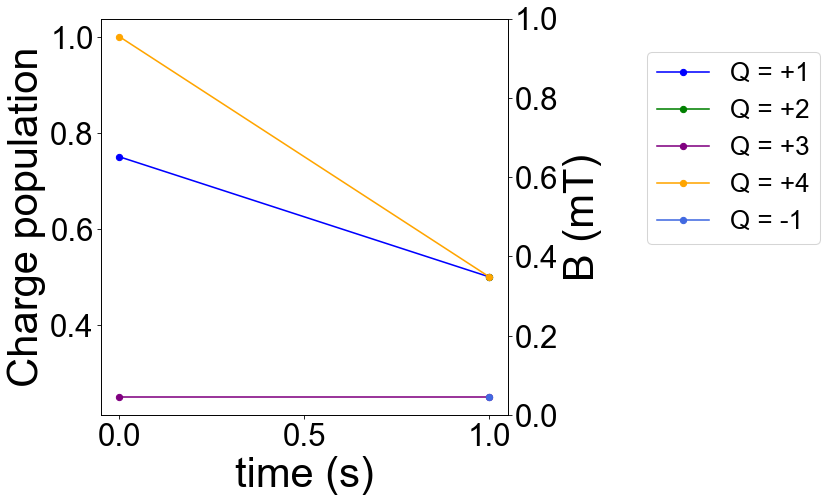

In [12]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax2 = ax1.twinx()
for typ_m, mtype in v_counts_m.groupby('type'):

    ax1.plot(mtype['time'], mtype["fraction"],'-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  
ax1.legend(fontsize = 25, bbox_to_anchor=(1.8, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

#ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()